In [1]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os


In [2]:
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
#(X_train, y_train), (X_test, y_test) = mnist.load_data(os.path.join(os.getcwd(), 'datasets/mnist.npz'))
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# model.add(Dense(units=64, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))


In [4]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [5]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000000100，即第8個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


In [7]:
y_TrainOneHot[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255


In [10]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  


Epoch 1/10
60/60 - 1s - loss: 0.7693 - accuracy: 0.8130 - val_loss: 0.3198 - val_accuracy: 0.9100
Epoch 2/10
60/60 - 1s - loss: 0.2921 - accuracy: 0.9192 - val_loss: 0.2440 - val_accuracy: 0.9329
Epoch 3/10
60/60 - 1s - loss: 0.2276 - accuracy: 0.9361 - val_loss: 0.2005 - val_accuracy: 0.9445
Epoch 4/10
60/60 - 1s - loss: 0.1877 - accuracy: 0.9474 - val_loss: 0.1763 - val_accuracy: 0.9508
Epoch 5/10
60/60 - 1s - loss: 0.1584 - accuracy: 0.9557 - val_loss: 0.1521 - val_accuracy: 0.9582
Epoch 6/10
60/60 - 1s - loss: 0.1357 - accuracy: 0.9622 - val_loss: 0.1388 - val_accuracy: 0.9601
Epoch 7/10
60/60 - 1s - loss: 0.1182 - accuracy: 0.9670 - val_loss: 0.1292 - val_accuracy: 0.9633
Epoch 8/10
60/60 - 1s - loss: 0.1041 - accuracy: 0.9712 - val_loss: 0.1190 - val_accuracy: 0.9661
Epoch 9/10
60/60 - 1s - loss: 0.0927 - accuracy: 0.9747 - val_loss: 0.1133 - val_accuracy: 0.9673
Epoch 10/10
60/60 - 1s - loss: 0.0827 - accuracy: 0.9777 - val_loss: 0.1088 - val_accuracy: 0.9690


In [11]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

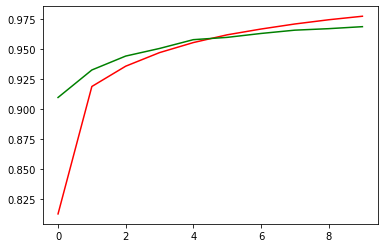

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_history.history['accuracy'], 'r')
plt.plot(train_history.history['val_accuracy'], 'g')


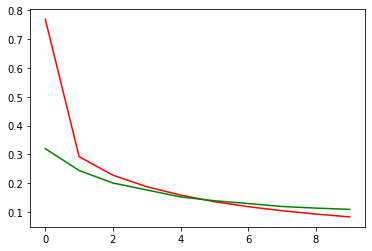

In [13]:
plt.plot(train_history.history['loss'], 'r')
plt.plot(train_history.history['val_loss'], 'g')

In [14]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9693

	[Info] Accuracy of testing data = 96.9%


In [16]:
# 預測(prediction)
X = x_Test_norm
predictions = model.predict_classes(X)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


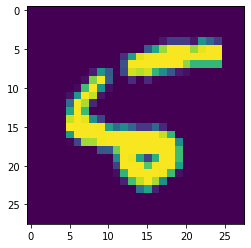

In [17]:
# 顯示錯誤的資料圖像
X2 = X_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [18]:
prob = model.predict(X)

In [19]:
prob[8]

array([1.7170760e-05, 5.0374001e-07, 1.3843706e-03, 3.9717634e-06,
       1.5216361e-04, 2.6803762e-02, 9.7140861e-01, 1.7903778e-08,
       2.0765302e-04, 2.1764390e-05], dtype=float32)

In [20]:
prob[0]

array([1.7305532e-05, 4.2219241e-08, 1.7658091e-04, 1.9856326e-03,
       6.1635667e-08, 9.2703003e-06, 1.6621661e-09, 9.9772412e-01,
       2.0903761e-05, 6.6097586e-05], dtype=float32)

In [21]:
model.save('20200830.h5')

In [22]:
ls -l

total 2416
-rw-r--r-- 1 root root 2467160 Aug 30 04:19 20200830.h5
drwxr-xr-x 1 root root    4096 Aug 27 16:39 sample_data/


In [23]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.png to 0.png
User uploaded file "0.png" with length 4441 bytes


In [25]:
uploaded_file = './0.png'

from skimage import data, color, io
from skimage.transform import rescale, resize, downscale_local_mean

image1 = io.imread(uploaded_file, as_gray=True)
#image1 = Image.open(uploaded_file).convert('LA')
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28*28) #/ 255
X1 = np.abs(1-X1)
#print(X1)
print("")
print("predict...")
predictions = model.predict_classes(X1)
print(predictions)



predict...
[0]


In [38]:
!rm "myDigits (1).zip"

In [39]:
!rm myDigits.zip

In [30]:
from google.colab import files

uploaded = files.upload()

Saving myDigits.zip to myDigits (1).zip


In [31]:
ls -l

total 2500
-rw-r--r-- 1 root root    4441 Aug 30 04:33  0.png
-rw-r--r-- 1 root root 2467160 Aug 30 04:19  20200830.h5
drwxr-xr-x 2 root root    4096 Apr 19 09:26  myDigits/
-rw-r--r-- 1 root root   34467 Aug 30 06:09 'myDigits (1).zip'
-rw-r--r-- 1 root root   34467 Aug 30 05:51  myDigits.zip
drwxr-xr-x 1 root root    4096 Aug 27 16:39  sample_data/


In [27]:
!unzip myDigits.zip

Archive:  myDigits.zip
   creating: myDigits/
  inflating: myDigits/0.png          
  inflating: myDigits/1.png          
  inflating: myDigits/2.png          
  inflating: myDigits/3.png          
  inflating: myDigits/4.png          
  inflating: myDigits/5.png          
  inflating: myDigits/6.png          
  inflating: myDigits/7.png          
  inflating: myDigits/8.png          
  inflating: myDigits/9.png          


In [32]:
ls -l

total 2500
-rw-r--r-- 1 root root    4441 Aug 30 04:33  0.png
-rw-r--r-- 1 root root 2467160 Aug 30 04:19  20200830.h5
drwxr-xr-x 2 root root    4096 Apr 19 09:26  myDigits/
-rw-r--r-- 1 root root   34467 Aug 30 06:09 'myDigits (1).zip'
-rw-r--r-- 1 root root   34467 Aug 30 05:51  myDigits.zip
drwxr-xr-x 1 root root    4096 Aug 27 16:39  sample_data/


In [34]:
uploaded_file = './myDigits/9.png'

from skimage import data, color, io
from skimage.transform import rescale, resize, downscale_local_mean

image1 = io.imread(uploaded_file, as_gray=True)
#image1 = Image.open(uploaded_file).convert('LA')
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28*28) #/ 255
X1 = np.abs(1-X1)
#print(X1)
print("")
print("predict...")
predictions = model.predict_classes(X1)
print(predictions)


predict...
[7]


In [35]:
model.predict(X1)

array([[0.00893016, 0.06349696, 0.02635322, 0.21246521, 0.04131909,
        0.05595099, 0.00144982, 0.31371376, 0.06163013, 0.21469061]],
      dtype=float32)